## Nothing useful here... just for me to test functions/play around

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
data = pd.read_json('../data/covid-19.json')
data['distinguished'] = data['distinguished'].fillna(value='none')

count    203113.000000
mean         22.012097
std         251.003406
min        -991.000000
25%           1.000000
50%           1.000000
75%           3.000000
max       22357.000000
Name: score, dtype: float64

more percentiles:
75.000%: 3.000
80.000%: 5.000
90.000%: 14.000
95.000%: 41.000
97.500%: 103.000
99.000%: 319.880
99.900%: 3493.984
99.990%: 10427.386
99.999%: 16848.965


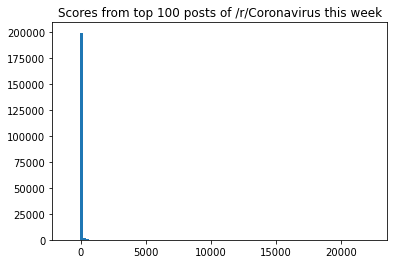

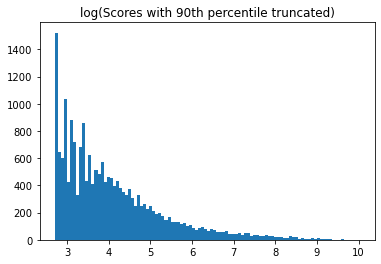

In [50]:
# basic info
print(data['score'].describe()); print()
print('more percentiles:')

percentiles = dict()
for i in (75, 80, 90, 95, 97.5, 99, 99.9, 99.99, 99.999):
    # store percentiles
    percentiles[i] = np.percentile(data['score'],i)
    print('{0:.3f}%: {1:.3f}'.format(i,percentiles[i]))

# take a look at score distribution...
plt.hist(data['score'], 100)
plt.title('Scores from top 100 posts of /r/Coronavirus this week')
plt.show()

# try stripping "insignificant" comments
data_stripped = list(filter(lambda x: x > percentiles[90], data['score']))
plt.title('log(Scores with 90th percentile truncated)')
plt.hist(np.log(data_stripped), 100)
plt.show()